# RX5

The production of maple syrup, known as “sugaring”, takes place just as winter is losing its grip. The maple producers, or “sugarmakers” look for weather that alternates between freezing and thawing; this is what makes the sap flow. In Vermont, sugaring weather usually starts around the beginning of March and normally lasts for about six weeks. Before the sugarmakers can produce syrup, they must tap their trees and this happens during January and February. Snow may lay deep in the woods at the start of sugaring, but the warm sun on the branches of the maple trees causes the long dormancy of winter to give way and the sugaring season to begin.

![](https://i.imgur.com/PVMZmFB.gif)

## Fertilizer and Sap Production

There is some controversy over whether fertilizer application can boost sap production in maple trees. It is known that vigorous trees tend to produce more sap, and trees with more foliage tend to have sweeter sap. However, it is not clear whether fertilizer application can help, and if so, by how much.

The Vermont Maple Sugar Producers sponsored a testing program to determine the benefit of fertilizer application. A random sample of 27 maple trees in Vermont was chosen and treated with one of three levels of fertilizer. In this experimental setup, nine trees were treated in the summer with each fertilizer level and the amount of sap produced (in ml) by each tree the following spring was measured.

## Importing Data into R

The text file containing all the data is located in the git repository. 

<span class="girk">**EXERCISE 1:**</span> Use the following read.delim() command and its arguments to save the data into an R object "maple". 

read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fish.txt", header = TRUE, sep = "\t", dec = ".")

Type summary(maple) to see what your dataset includes. Then type attach(maple) to associate the column headers with the data.


In [1]:
maple <-read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/maple.txt", header = TRUE, sep = "\t", dec = ".")
summary(maple)
attach(maple)

      SAP            FERT              REGION         
 Min.   :74.20   Length:27          Length:27         
 1st Qu.:80.90   Class :character   Class :character  
 Median :87.00   Mode  :character   Mode  :character  
 Mean   :86.15                                        
 3rd Qu.:91.30                                        
 Max.   :98.20                                        

## Exploratory Data Analysis:

<span class="girk">**EXERCISE 2:**</span> Start by plotting a boxplot of sap production (SAP) by fertilizer level (FERT). Does it appear that there is a difference in sap production by fertilizer level? Which produces the most and which the least amount of sap?

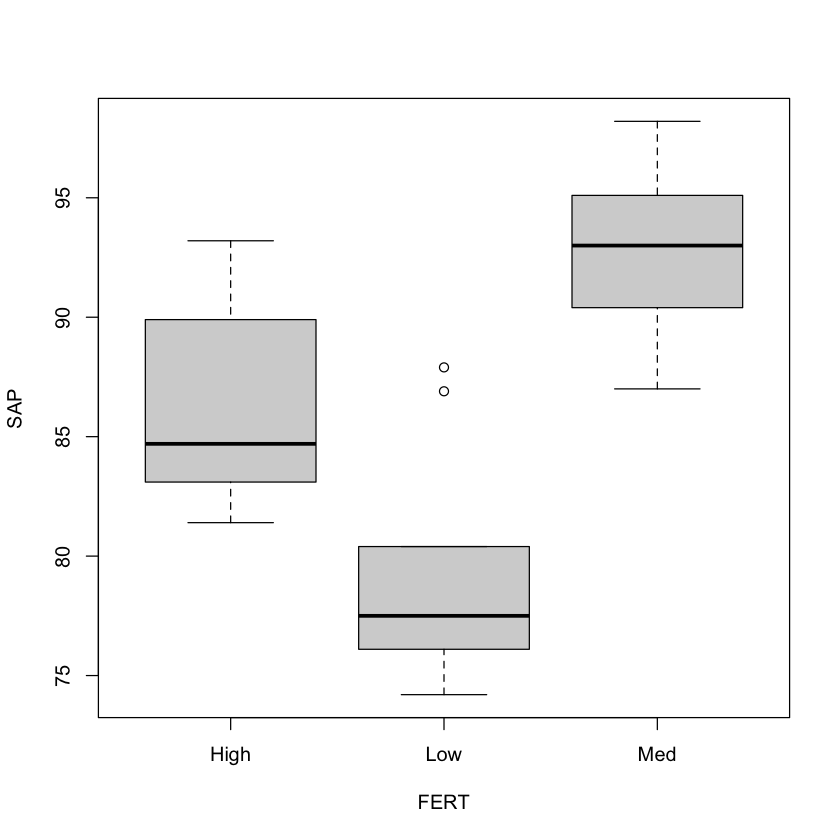

In [7]:
boxplot(SAP~FERT)
#Looking at the boxplot, there does appear to be a difference 
#in the SAP production by fertilizer level.
#The most amount of SAP seems to be produced by medium level of fertilizer
#and the least amount of SAP seems to be produced by the low amount of fertilizer

By default, R orders the levels of a categorical variable, such as FERT alphabetically. If you want to specify the ordering, you can use the function ordered(), as in:
```
maple$FERT=ordered(maple$FERT, levels=c("Low", "Med", "High"))
```

<span class="girk">**EXERCISE 3:**</span> Use ordered(), attach maple again and redo your boxplot to see that the ordering of the levels of FERT has changed.

The following objects are masked from maple (pos = 3):

    FERT, REGION, SAP




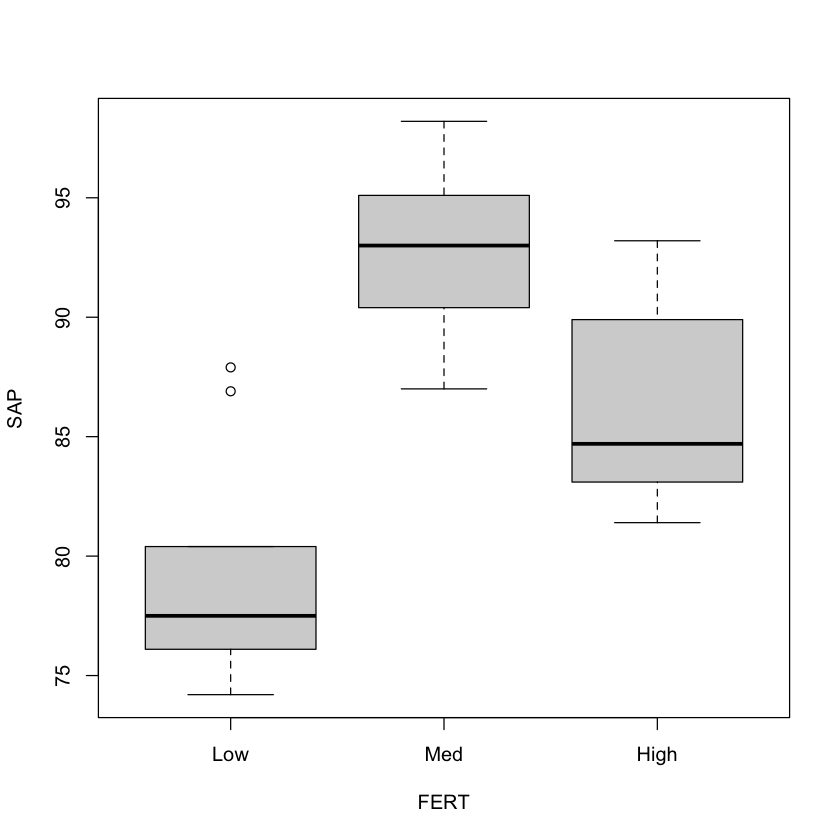

In [8]:
maple$FERT=ordered(maple$FERT, levels=c("Low", "Med", "High"))
attach(maple)
boxplot(SAP~FERT)

<span class="girk">**EXERCISE 4:**</span> Calculate the mean sap production for each fertilizer application level. These are the treatment means. You can do this using the indexing notation in R. For example:
```
mean(SAP[FERT=="Low"])
```

There is also a function in R called tapply() that can be used to calculate the mean (or any other function) of values X that have the same value of another INDEX variable. Try:

```
tapply(X=SAP, INDEX=FERT, FUN=mean)
```

In [9]:
mean(SAP[FERT=="Low"]) #=79.37778
tapply(X=SAP, INDEX=FERT, FUN=mean) #Low=79.37778 Med=92.80000 High=86.27778

[1] 79.37778

Low      Med     High 
79.37778 92.80000 86.27778

<span class="girk">**EXERCISE 5:**</span> Calculate an estimate of the variance of the three treatment means. Multiply this variance by 9, write down the result, and save it as VARMEAN.

In [13]:
VARMEAN=9*var(tapply(X=SAP, INDEX=FERT, FUN=mean))
VARMEAN
#VARMEAN = 405.4581

[1] 405.4581

**EXERCISE 6:** If you subtract the grand mean from the three means returned by tapply(), you will have estimates of what are called treatment effects in ANOVA. Do this and save the result as a vector TEFFECTS.

In [14]:
TEFFECTS=tapply(X=SAP, INDEX=FERT, FUN=mean)-mean(SAP)
TEFFECTS
#Low=-6.7740741  Med=6.6481481  High=0.1259259

Low        Med       High 
-6.7740741  6.6481481  0.1259259

<span class="girk">**EXERCISE 7:**</span> Use tapply() to calculate the variance of sap production for each fertilizer level. Which is the most variable? Can you see this in your boxplot? Calculate the mean of these three variances, write down the result and save it as MEANVAR.

In [15]:
tapply(X=SAP, INDEX=FERT, FUN=var)
#Low=24.27944 Med=13.59750 High=17.00444 
#Low is the most variable. This can also be observed from the box plots
#because Low is the only treatment that has any outliers. In fact it has 2 outliers
#and both are far away from median or mean.
 
MEANVAR=mean(tapply(X=SAP, INDEX=FERT, FUN=var))
MEANVAR
#MEANVAR = 18.2938

Low      Med     High 
24.27944 13.59750 17.00444

[1] 18.2938